<a href="https://colab.research.google.com/github/rezlevi/Big-Project/blob/main/Weather_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plusz importálások:

In [ ]:
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive munkamappa megadása:

In [ ]:
path = ('/content/drive/MyDrive/afp1/ML Anyagok/') #drive mappa útvonala
munkamappa = '/content/drive' + path

Adatok beolvasása:

In [ ]:
import pandas as pd
csv_path = path + 'BP_d.csv'
df = pd.read_csv(csv_path, sep=";")
#df.head()

Nyersanyag statisztika:

In [ ]:
#plot

Adathalmaz szűrése:

In [ ]:
df_filtered = df[ ["datum", "d_ta", "d_tx", "d_tn"]]
df_test = df_filtered[df_filtered["datum"] > "1979-12-31"]
df_train = df_filtered[df_filtered["datum"] < "1980-01-01"]
df_test.drop(columns='datum')
df_train = df_train[[ "d_ta", "d_tx", "d_tn"]]


#

x_train = df_train.iloc[1: , :]
y_train = df_train[["d_ta"]]
y_train = y_train.iloc[1: , :]

y_train =y_train.to_numpy()
x_train = x_train.to_numpy()


Adatok modelhez igazítása:

In [ ]:
import numpy as np

HISTS = [8, 10, 12]
functions = ['tanh', 'sigmoid', 'relu']
dropouts = [ 0.2, 0.3]

HIST = 10
func = 'tanh'
dropout = 0.3
epoch = 30

train_x=(np.array([x_train[i:i+HIST] for i in range(len(x_train)-HIST)])-8)/40 
train_y=(np.array([x_train[i+HIST] for i in range(len(x_train)-HIST)])-8)/40



Model trainingje, model adatainak lementése

In [ ]:
import tensorflow as tf
from keras.callbacks import CSVLogger
#Uj model
name_of_session = 'model_' + str(HIST) + "_" + func + "_" + str(dropout)
logger_path = path + 'stats' + name_of_session + ".csv"

csv_logger = tf.keras.callbacks.CSVLogger(logger_path, separator=',', append=True)


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(HIST, 3)),
  tf.keras.layers.Dense(100, activation= func),
  tf.keras.layers.Dense(50, activation= func),
  tf.keras.layers.Dense(3, activation= func)
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=epoch,  callbacks=[csv_logger])
model.save(path + name_of_session + ".h5")

Epoch 1/2
902/902 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9924
Epoch 2/2
902/902 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 0.9998


In [ ]:
import tensorflow as tf
#Model betoltessel

name_of_session = 'model_' + str(HIST) + "_" + func + "_" + str(dropout)
logger_path = path + 'stats' + name_of_session + ".csv"

csv_logger = tf.keras.callbacks.CSVLogger(logger_path, separator=',', append=True)

model = tf.keras.models.load_model(path + "model_10_tanh_0.3.h5")

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=epoch,  callbacks=[csv_logger])
model.save(path + name_of_session + ".h5")

In [1]:
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
epochs = [ i for i in range(50)]

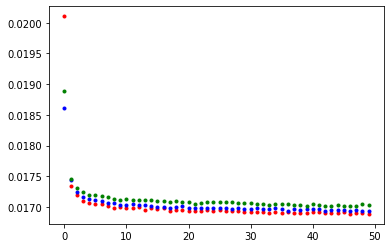

In [6]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_relu_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_relu_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_relu_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

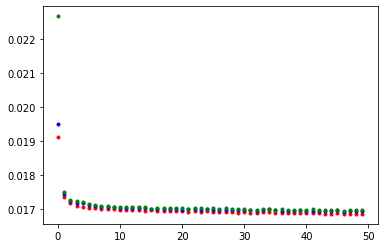

In [7]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_relu_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_relu_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_relu_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

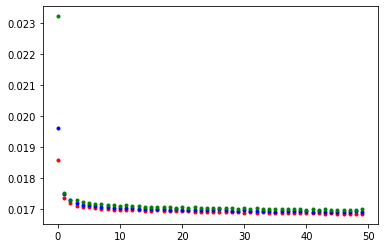

In [8]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_relu_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_relu_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_relu_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

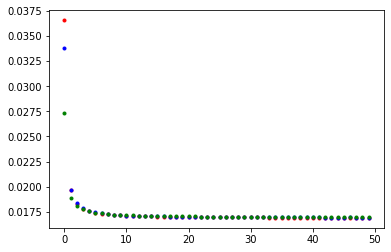

In [9]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_sigmoid_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_sigmoid_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_sigmoid_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

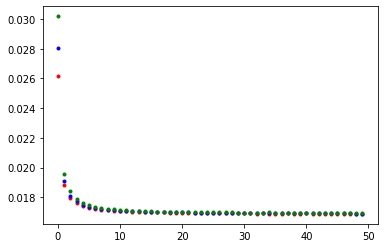

In [10]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_sigmoid_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_sigmoid_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_sigmoid_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

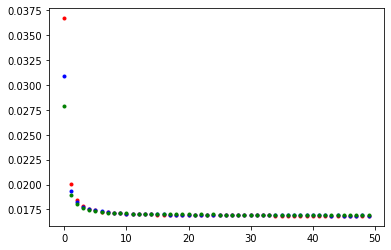

In [11]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_sigmoid_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_sigmoid_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_sigmoid_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

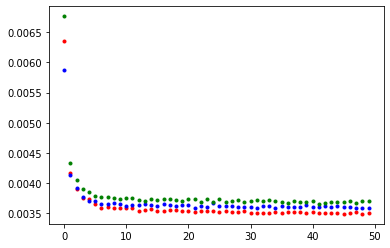

In [12]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_tanh_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_tanh_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_8_tanh_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

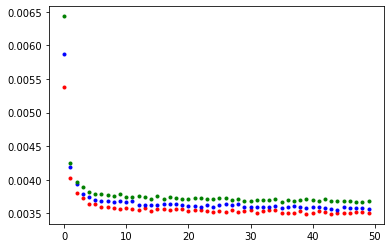

In [13]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_tanh_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_tanh_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_10_tanh_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")

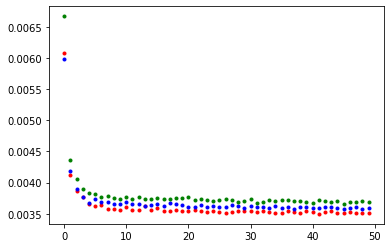

In [14]:
datas1=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_tanh_0.2.csv")]
losses1 = [ float(datas1[i][2]) for i in range(1,51)]
plt.plot(epochs,losses1,"r.")
datas2=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_tanh_0.25.csv")]
losses2= [ float(datas2[i][2]) for i in range(1,51)]
plt.plot(epochs,losses2,"b.")
datas3=[row.strip().split(sep=",") for row in open("/content/drive/My Drive/Files/stats_model_12_tanh_0.3.csv")]
losses3 = [ float(datas3[i][2]) for i in range(1,51)]
plt.plot(epochs,losses3,"g.")